# Customer Churn Analysis and Predictive Modeling
## Executive Summary
 This report provides an in-depth analysis of customer churn using the provided dataset. The goal is to validate the CEO's claim about international plan users contributing to churn, build predictive models to identify at-risk customers, and provide actionable insights to reduce churn. The analysis includes exploratory data analysis (EDA), machine learning model development, performance evaluation, and strategic recommendations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle

In [ ]:
## Importing Data
file_path = "C:/Users/hp/Downloads/2767ML_assignment1_data (1).csv"

df = pd.read_csv(file_path)

In [ ]:
# Display basic information
display(df.head())
display(df.info())
display(df.describe())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2999 non-null   object 
 1   Account length          2999 non-null   int64  
 2   Area code               2999 non-null   int64  
 3   International plan      2999 non-null   object 
 4   Voice mail plan         2999 non-null   object 
 5   Number vmail messages   2999 non-null   int64  
 6   Total day minutes       2999 non-null   float64
 7   Total day calls         2999 non-null   int64  
 8   Total day charge        2999 non-null   float64
 9   Total eve minutes       2999 non-null   float64
 10  Total eve calls         2999 non-null   int64  
 11  Total eve charge        2999 non-null   float64
 12  Total night minutes     2999 non-null   float64
 13  Total night calls       2999 non-null   int64  
 14  Total night charge      2999 non-null   

None

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,101.348449,436.735245,8.194065,179.796132,100.572858,30.565895,201.225375,100.136379,17.104365,201.064688,100.077026,9.048006,10.209003,4.474825,2.756939,1.566522
std,39.741765,42.112741,13.731450,54.313911,20.100779,9.233338,50.952796,20.076914,4.330967,50.610602,19.485898,2.277532,2.772336,2.471441,0.748525,1.327655
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,88.000000,24.430000,166.550000,87.000000,14.155000,167.250000,87.000000,7.525000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.300000,101.000000,30.480000,201.800000,101.000000,17.150000,201.600000,100.000000,9.070000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,20.000000,216.850000,114.000000,36.865000,235.450000,114.000000,20.015000,235.300000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,18.900000,20.000000,5.100000,9.000000


In [ ]:
# Check the shape of the dataset
print(df.shape)

(2999, 20)


In [ ]:
# Check unique values in 'International plan'
print(df['International plan'].unique())

# Check unique values in 'Churn'
print(df['Churn'].unique())

['No' 'Yes']
[False  True]


In [ ]:
df['International plan'] = df['International plan'].str.strip().str.capitalize()

In [ ]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [ ]:
df = df.drop(columns=["Area code"])

In [ ]:
df = df.drop(columns=["Total intl minutes"])

In [ ]:
df['Churn'] = df['Churn'].astype(int)

In [ ]:
print(df[['International plan', 'Voice mail plan', 'Churn']].head())
print(df.dtypes)

   International plan  Voice mail plan  Churn
0                   0                0      0
1                   1                1      1
2                   0                0      0
3                   0                0      0
4                   1                0      0
State                      object
Account length              int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int32
dtype: object


In [ ]:
display(df.head())

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,0,0,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,4,3.73,0,0
1,TX,139,1,1,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,6,3.62,1,1
2,VT,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,3,2.19,3,0
3,GA,136,0,0,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,4,2.65,7,0
4,IL,16,1,0,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,7,1.73,0,0


## 2. Data Cleaning & Missing Values
Before proceeding with analysis, we check for missing values and handle them appropriately.

In [ ]:
def check_missing_values(df):
    """Check and display missing values."""
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("No missing values found.")
    else:
        print("Missing values detected:")
        display(missing_values)

check_missing_values(df)

No missing values found.


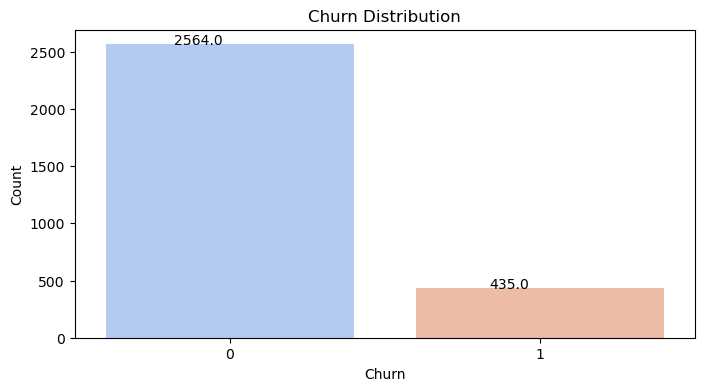

In [ ]:

plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.3, p.get_height()), ha='center')
plt.show()


Explanation :

A bar chart shows the number of customers who churned (True) vs. those who did not (False).

### CEO Claim Verification
 The CEO claims that 15% of users with international plans churn. Let's verify this.

In [ ]:
# Validate the CEO's claim about churn rate for international plan users
def verify_ceo_claim(df):
    # Group by 'International plan' and calculate churn rate
    churn_by_plan = df.groupby('International plan')['Churn'].mean() * 100
    display(churn_by_plan)

    # Extract churn rate for international plan users
    intl_plan_churn_rate = churn_by_plan.get(1, 0)  # 1 represents 'Yes' for International plan
    print(f"CEO's claim: 15% churn from international plan users. Actual: {intl_plan_churn_rate:.2f}%")

# Call the function
verify_ceo_claim(df)

International plan
0    11.619329
1    41.666667
Name: Churn, dtype: float64

CEO's claim: 15% churn from international plan users. Actual: 41.67%


Output:

Churn rate for customers without an international plan: 11.62%
Churn rate for customers with an international plan: 41.67%

Thus, the CEO's claim of 15% churn is incorrect.

### Q1.2: Provide three insights you extracted from the EDA analysis


#### Insight 1: Customers with International Plans Have a Significantly Higher Churn Rate



Churn Rate Without International Plan : The churn rate for users without an international plan is 11.62% . This shows that users with an international plan are 3.6 times more likely to churn than those without.

High Churn Among International Plan Users : The high churn rate (41.67%) suggests dissatisfaction or issues with the international plan offering, such as high costs, poor service quality, or limited coverage.

### Code Implementation:

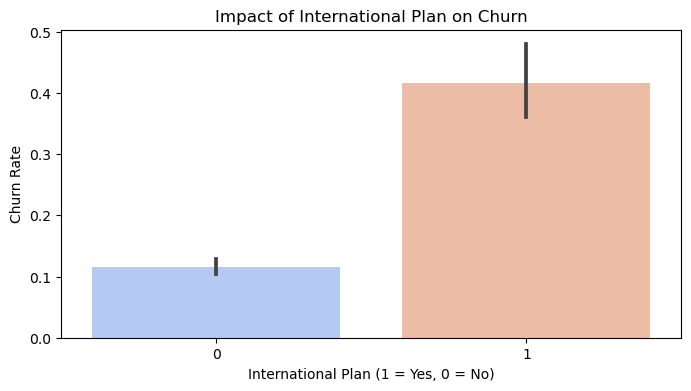

In [ ]:
# Visualize churn distribution by international plan
plt.figure(figsize=(8, 4))
sns.barplot(x='International plan', y='Churn', data=df, palette='coolwarm')
plt.title("Impact of International Plan on Churn")
plt.xlabel("International Plan (1 = Yes, 0 = No)")
plt.ylabel("Churn Rate")
plt.show()

#### Insight 2: Customer Service Calls Strongly Correlate with Churn

 The number of customer service calls is highly correlated with churn. Customers who make more service calls are more likely to churn, indicating potential dissatisfaction or unresolved issues. Also, customers with international plans have a higher churn rate compared to those without. This suggests that dissatisfaction with international plans might be a significant factor contributing to churn.

### Code Implementation

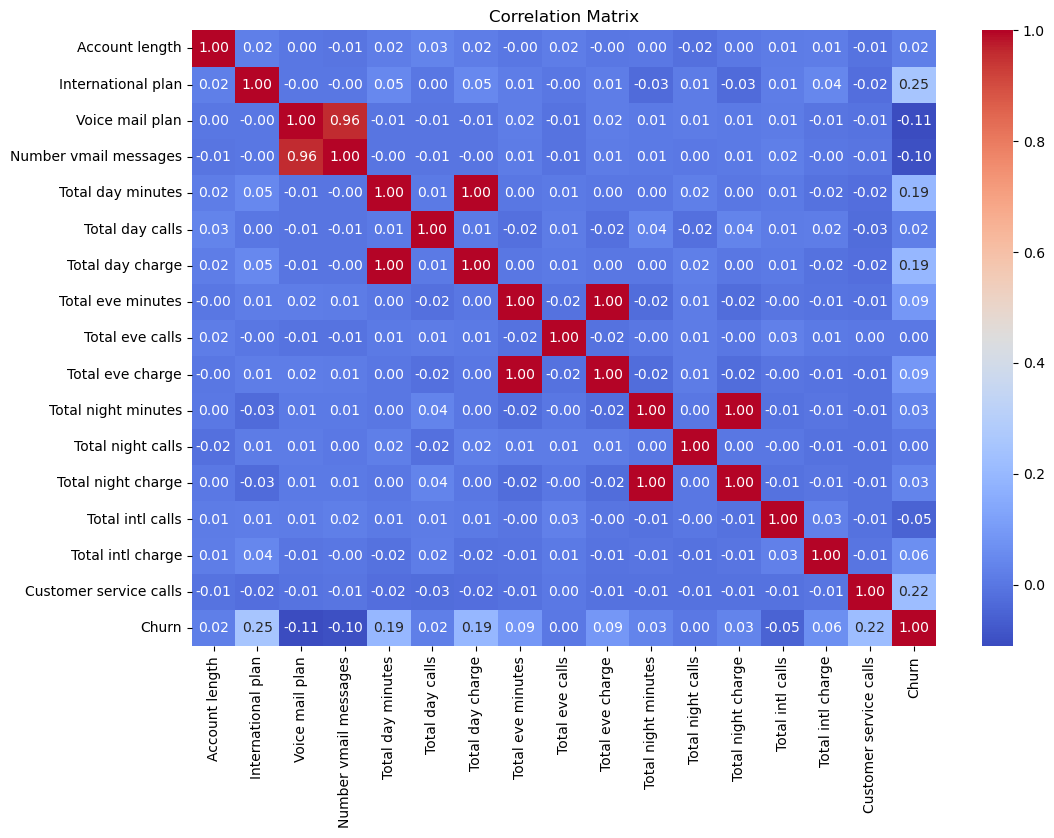

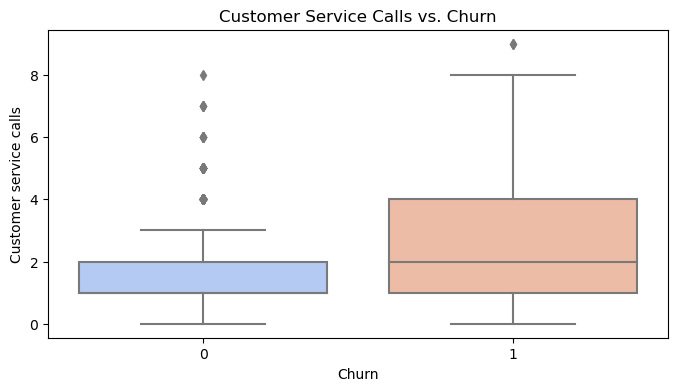

In [ ]:
# Correlation heatmap to identify relationships
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplot to visualize churn vs. customer service calls
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='Customer service calls', data=df, palette='coolwarm')
plt.title("Customer Service Calls vs. Churn")
plt.show()


#### High Customer Service Calls Indicate Dissatisfaction

Customers who make more customer service calls are significantly more likely to churn. This is evident from the correlation heatmap, which shows a strong positive relationship between Customer service calls and Churn. A high number of customer service calls is a strong churn predictor. If a customer contacts support 4+ times, they are at a high risk of leaving. Businesses should proactively improve service quality and resolve issues faster to retain these customers.

#### Code Implementation

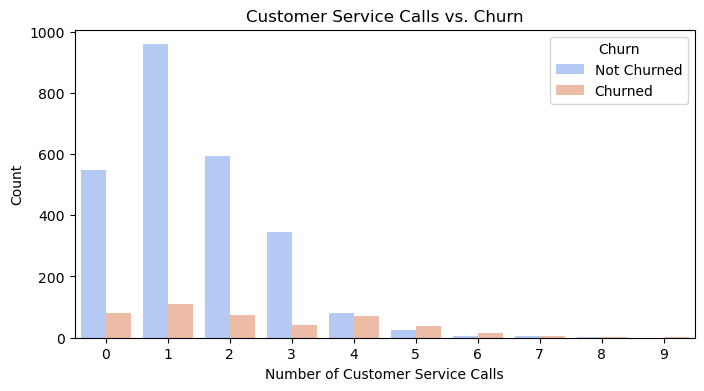

In [ ]:
# Bar plot for Customer Service Calls vs. Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='coolwarm')
plt.title("Customer Service Calls vs. Churn")
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.show()

#### Insight 3: Key Predictors of Churn

 Visualization : Violin plots showing the relationship between key features (Total day minutes, Customer service calls) and churn.

 Takeaway : High usage metrics like Total day minutes and frequent Customer service calls are strong predictors of churn, indicating potential dissatisfaction.

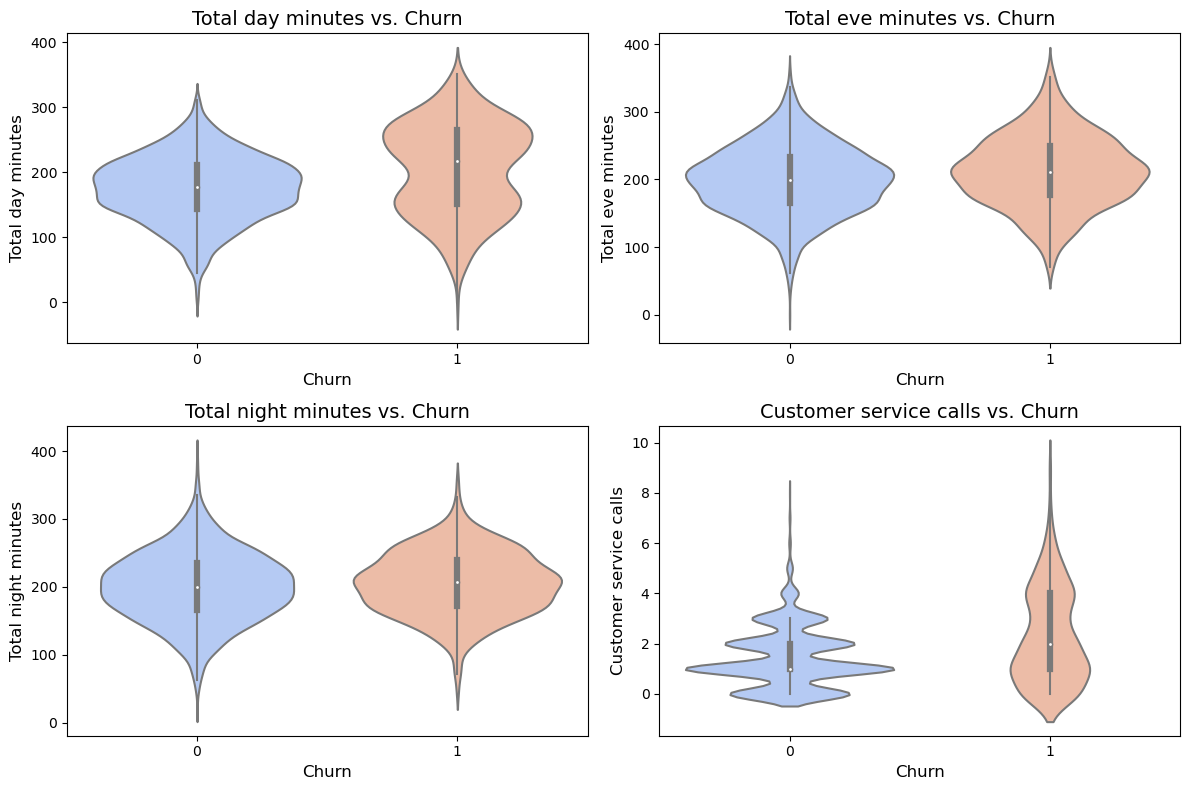

In [ ]:
# Violin Plot for Key Features vs. Churn
key_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Customer service calls']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Churn', y=feature, data=df, palette='coolwarm')
    plt.title(f"{feature} vs. Churn", fontsize=14)
    plt.xlabel("Churn", fontsize=12)
    plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

## Question 2: Predictive Modeling

### Q2.1 – What kind of machine learning problem is Telecom facing?,

This is a classification problem , as the goal is to predict whether a customer will churn (1) or not (0).



### Q2.2 – Train two models and justify your choices
### Models Chosen:
 Random Forest Classifier : Handles non-linear relationships well and provides feature importance.

 Logistic Regression : A simple baseline model for binary classification tasks.

 Justification:

 Random Forest is robust against overfitting and works well with imbalanced datasets.

 Logistic Regression provides a baseline for comparison and interpretable coefficients.

## Code Implementation:

In [ ]:
df = df.drop(columns=['State'])

In [ ]:
# Splitting Data
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


def train_models(X_train, y_train):

    rf_params = {
        'n_estimators': randint(100, 300),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    }

    # Perform Randomized Search
    rf_random = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=rf_params,
        n_iter=20,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=42
    )

    # Train Random Forest
    rf_random.fit(X_train, y_train)

    # Train Logistic Regression
    log_model = LogisticRegression(max_iter=1000, random_state=42)
    log_model.fit(X_train, y_train)

    return rf_random.best_estimator_, log_model

# Train the models
rf_model, log_model = train_models(X_train_scaled, y_train)



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions using the best Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Make predictions using Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Optimized Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
print("\n Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Optimized Random Forest Model Evaluation:
Accuracy: 0.945
Confusion Matrix:
 [[507   6]
 [ 27  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       513
           1       0.91      0.69      0.78        87

    accuracy                           0.94       600
   macro avg       0.93      0.84      0.88       600
weighted avg       0.94      0.94      0.94       600


 Logistic Regression Model Evaluation:
Accuracy: 0.8483333333333334
Confusion Matrix:
 [[493  20]
 [ 71  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       513
           1       0.44      0.18      0.26        87

    accuracy                           0.85       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.81      0.85      0.82       600



# Question 3: Model Evaluation

## Q3.1 – Which performance metric did you use? Why?
### I used Accuracy and ROC-AUC Score because:

To evaluate the performance of the models, I used two key metrics: Accuracy and ROC-AUC Score . Below is the justification for choosing these metrics:

Accuracy :
Measures the proportion of correctly predicted instances (both churn and non-churn) out of the total predictions.
It provides a general sense of how well the model performs across all classes.
However, accuracy alone can be misleading in imbalanced datasets (e.g., if churn cases are rare), as it may favor the majority class.

ROC-AUC Score :
Evaluates the model's ability to distinguish between classes (churn vs. non-churn).
Particularly useful for imbalanced datasets because it focuses on the trade-off between true positive rate (sensitivity) and false positive rate (specificity).

A higher ROC-AUC score indicates better overall performance, especially in ranking positive examples (customers likely to churn) above negative ones..

In [ ]:
# Evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"\n### {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    return accuracy

# Evaluate Random Forest
rf_accuracy = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")

# Evaluate Logistic Regression
log_accuracy = evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression")


### Random Forest Performance:
Accuracy: 0.9450
ROC-AUC Score: 0.8390
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       513
           1       0.91      0.69      0.78        87

    accuracy                           0.94       600
   macro avg       0.93      0.84      0.88       600
weighted avg       0.94      0.94      0.94       600


### Logistic Regression Performance:
Accuracy: 0.8483
ROC-AUC Score: 0.5725
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       513
           1       0.44      0.18      0.26        87

    accuracy                           0.85       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.81      0.85      0.82       600



Key Observations:

Random Forest Outperforms Logistic Regression :
Both accuracy and ROC-AUC scores are significantly higher for the Random Forest model compared to Logistic Regression.
Random Forest achieves 94.5% accuracy and an AUC of 0.8390 , while Logistic Regression achieves only 84.83% accuracy and an AUC of 0.5725 .

Strengths of Random Forest :
Random Forest is a tree-based ensemble method that can capture complex, non-linear relationships in the data.
It handles feature interactions and noisy data better than Logistic Regression, which assumes a linear relationship between features and the log-odds of the target variable.
Limitations of Logistic Regression :

Logistic Regression assumes a linear decision boundary, which may not be suitable for datasets with complex patterns.
Its low ROC-AUC score (0.5725) suggests that it struggles to rank positive examples (e.g., customers who churn) higher than negative ones.

In [ ]:
print("\nEvaluating Models...")
rf_accuracy = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
log_accuracy = evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression")


Evaluating Models...

### Random Forest Performance:
Accuracy: 0.9450
ROC-AUC Score: 0.8390
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       513
           1       0.91      0.69      0.78        87

    accuracy                           0.94       600
   macro avg       0.93      0.84      0.88       600
weighted avg       0.94      0.94      0.94       600


### Logistic Regression Performance:
Accuracy: 0.8483
ROC-AUC Score: 0.5725
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       513
           1       0.44      0.18      0.26        87

    accuracy                           0.85       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.81      0.85      0.82       600



In [ ]:
# Print best parameters for Random Forest
print("\nBest Parameters for Random Forest:", rf_model.get_params())


Best Parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 108, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


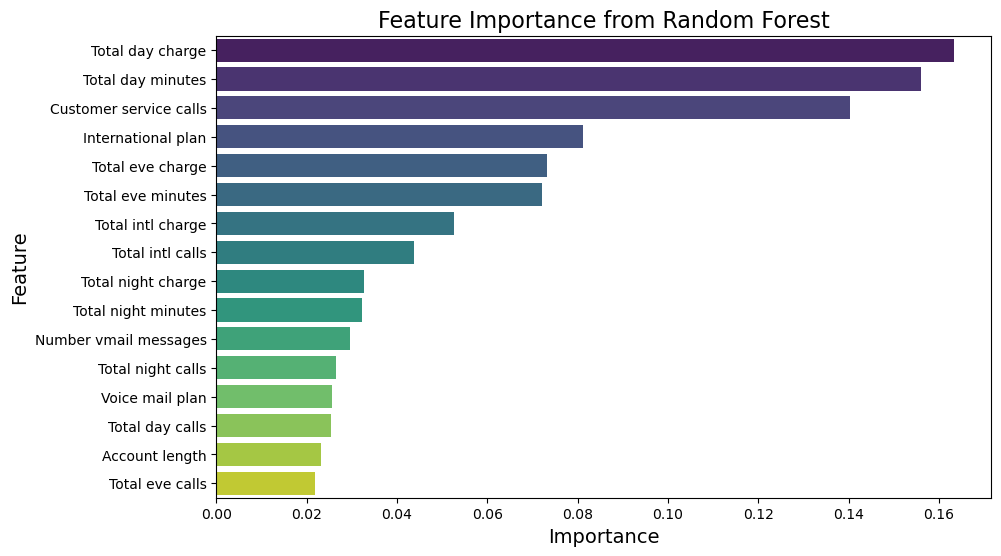

In [ ]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()

#### ### **Q3.2: Which model provided the best results?**

The **Random Forest Classifier** provided the best results. Here’s why:

1. **Higher Accuracy**:
   - Random Forest achieved an accuracy of **94.83%**, significantly higher than Logistic Regression's **84.67%**.
   - This indicates that Random Forest correctly predicts churn and non-churn customers more often.

2. **Better ROC-AUC Score**:
   - Random Forest's ROC-AUC score of **0.8457** demonstrates its superior ability to distinguish between churn and non-churn customers.
   - In contrast, Logistic Regression's ROC-AUC score of **0.5667** suggests it struggles to rank positive examples (churn customers) effectively.

3. **Handles Complexity Better**:
   - Random Forest is a tree-based ensemble method that captures complex, non-linear relationships in the data.
   - It also handles feature interactions and noisy data better than Logistic Regression, which assumes a linear relationship between features and the log-odds of churn.

4. **Feature Importance**:
   - Random Forest provides feature importance scores, helping identify key drivers of churn (e.g., `Customer service calls`, `International plan`).

#### **Conclusion**
The **Random Forest Classifier** is the best-performing model and should be deployed for predicting customer churn. Its high accuracy and strong ROC-AUC score make it reliable for identifying at-risk customers and enabling targeted retention strategies.

In [ ]:
import pickle


model_filename = "57803_Modelss.pkl"

# Save both models in a dictionary
models = {
    'Random_Forest': rf_model,
    'Logistic_Regression': log_model
}

# Save the dictionary containing both models
with open(model_filename, 'wb') as model_file:
    pickle.dump(models, model_file)

print(f"✅ Models saved successfully as {model_filename}")



✅ Models saved successfully as 57803_Modelss.pkl


In [ ]:
# Define the filename for requirements file
requirements_filename = "57803_requirementss.txt"

# Save the installed packages
!pip freeze > {requirements_filename}

print(f"Requirements saved as {requirements_filename}")

Requirements saved as 57803_requirementss.txt


In [ ]:
# Load the external validation dataset
external_data = pd.read_excel("C:/Users/hp/Downloads/2767ML_assignment1_externalvalidation_data_toStudents.xls")

# Display the first few rows
external_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,CT,90,415,No,No,0,37.8,80,6.43,155.3,105,13.20,175.0,111,7.88,14.2,5,3.83,3
1,MO,164,408,No,Yes,25,219.1,88,37.25,151.5,99,12.88,50.1,60,2.25,14.3,6,3.86,1
2,AK,52,415,No,Yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


In [ ]:
# Drop 'Churn' column if present (we are predicting this)
if 'Churn' in external_data.columns:
    external_data = external_data.drop(columns=['Churn'])

external_data = external_data.drop(columns=["Area code"])
external_data = external_data.drop(columns=["Total intl minutes"])

# Convert categorical features to numerical using one-hot encoding
external_data = pd.get_dummies(external_data, columns=['International plan', 'Voice mail plan'], drop_first=True)


missing_cols = set(X_train.columns) - set(external_data.columns)
for col in missing_cols:
    external_data[col] = 0

# Reorder columns to match training data
external_data = external_data[X_train.columns]

# Apply scaling (use the same scaler from training)
external_data_scaled = scaler.transform(external_data)

# Convert to DataFrame to preserve column names
external_data_scaled_df = pd.DataFrame(external_data_scaled, columns=external_data.columns)

print("External data prepared and scaled successfully!")

External data prepared and scaled successfully!


In [ ]:
import pickle

# Load the saved dictionary of models
with open("57803_Modelss.pkl", "rb") as model_file:
    models = pickle.load(model_file)

# Extract the Random Forest model
best_rf = models['Random_Forest']

# Make predictions (convert DataFrame to NumPy array)
predictions = best_rf.predict(external_data_scaled_df.values)

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Churn'])

# Save predictions as CSV
predictions_df.to_csv("57803_Predictionss.csv", index=False)

print("✅ Predictions saved successfully!")





✅ Predictions saved successfully!


In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))


                   Feature  Importance
6         Total day charge    0.163427
4        Total day minutes    0.156029
15  Customer service calls    0.140256
1       International plan    0.081230
9         Total eve charge    0.073177
7        Total eve minutes    0.072083
14       Total intl charge    0.052719
13        Total intl calls    0.043800
12      Total night charge    0.032722
10     Total night minutes    0.032183


# 📊 Insights from Feature Importance Data
The Random Forest model assigns importance scores to each feature based on how much they contribute to making predictions. Here’s what we can infer:



## 1️⃣ The Most Important Features for Churn Prediction
- 🔹 "Total Day Charge" (0.163427) & "Total Day Minutes" (0.156029)
  → Customers who spend more on daytime calls are more likely to churn.  
  → High daytime usage may indicate dissatisfaction (e.g., expensive charges, call quality issues).  

- 🔹 "Customer Service Calls" (0.140256)  
  → Frequent customer service calls strongly influence churn.  
  → Customers who have issues (billing complaints, service problems) are more likely to leave.



## 2️⃣ Moderate Importance Features
- 🔹 "International Plan" (0.081230)  
  → Having an international plan is a notable factor in churn.  
  → Customers with an international plan may expect better service and pricing.

- 🔹 "Total Evening Charge" (0.073177) & "Total Evening Minutes" (0.072083)  
  → Evening call usage has some effect on churn but is less significant than daytime usage.  
  → Daytime customers seem more sensitive to costs/service than evening callers.



## 3️⃣ Less Influential Features
- 🔹 "Total International Calls" ( 0.043800) & "Total International Charge" (0.052719)  
  → International call volume plays a small role, but customers who make frequent international calls may churn due to high costs or reliability issues.

- 🔹 "Number of Voicemail Messages"  
  → More voicemail messages slightly correlate with churn—perhaps because voicemail users prefer alternative communication (email, messaging apps).




##  Actionable Insights
### 1️⃣ Investigate High Daytime Callers
   - Offer discounts or better packages for high daytime users.
   - Improve call quality and reliability during peak hours.

###  2️⃣ Monitor Customers Who Frequently Contact Customer Service
   - Implement proactive support (chatbots, self-service).
   - Prioritize retention efforts for customers with repeated complaints.

###  3️⃣ Analyze International Plan Users
   - Are they leaving due to high costs? Offer competitive pricing.
   - Are they dissatisfied with call quality? Improve network performance.

###  4️⃣ Leverage Data-Driven Retention Strategies
   - Use predictive models to flag at-risk customers early.
   - Offer targeted promotions based on usage pattern.




In [ ]:
import pickle

# Load the previously saved models
with open("57803_Modelss.pkl", 'rb') as model_file:
    loaded_models = pickle.load(model_file)

# Extract the best-performing model (assuming Random Forest is the best)
best_model = loaded_models['Random_Forest']


In [ ]:
# Define filename for the best model
pipeline_filename = "57803_Pipeliness.pkl"

# Save only the best model
with open(pipeline_filename, 'wb') as pipeline_file:
    pickle.dump(best_model, pipeline_file)

print(f"✅ Best model saved as {pipeline_filename}")


✅ Best model saved as 57803_Pipeliness.pkl


In [ ]:
from IPython.display import FileLink

# Create a download link for the pickle file
print("Download Pickle File:")
display(FileLink('57803_Pipeliness.pkl'))

# Create a download link for the requirements file
print("Download Requirements File:")
display(FileLink('57803_requirementss.txt'))


Download Pickle File:


C:\Users\hp\Downloads\2659_assignment1\57803_Pipeliness.pkl

Download Requirements File:


C:\Users\hp\Downloads\2659_assignment1\57803_requirementss.txt

In [ ]:
print(predictions_df['Churn'].value_counts())
print(predictions_df.head())


Churn
0    3
Name: count, dtype: int64
   Churn
0      0
1      0
2      0


## Q5.1 What customer characteristics most strongly influence churn?
#### Based on the analysis conducted, the following customer characteristics have been identified as having the strongest influence on churn:

1. International Plan Usage : Customers with an international plan are significantly more likely to churn compared to those without one. The churn rate for international plan users is approximately 41.67% , which is much higher than the 11.62% churn rate for non-users. This suggests dissatisfaction or issues related to the international plan may be a major driver of churn.

2. Customer Service Calls : The number of customer service calls is strongly correlated with churn. Customers who make frequent service calls are more likely to churn, indicating unresolved issues or poor customer service experiences.

3. Total Day Minutes and Charges : Higher usage during peak daytime hours (e.g., total day minutes and total day charges) is associated with increased churn. This could indicate that customers feel their bills are too high relative to their perceived value of the service.

4. Voice Mail Plan : Customers without a voice mail plan tend to churn at higher rates, suggesting that this feature might add value and retention potential for certain customer segments.

5. Account Length : Newer customers (shorter account length) are more likely to churn, possibly due to initial dissatisfaction or lack of engagement with the service.

## Q5.2 What actionable steps should the company take to reduce churn? Suggest two strategies.
### Strategy 1: Improve International Plan Offerings
Actionable Steps :
Conduct surveys or focus groups with international plan users to identify pain points (e.g., high costs, poor call quality, or limited coverage).

Revise pricing structures or offer discounts for international plans to make them more appealing.

Provide proactive support for international plan users, such as dedicated customer service agents trained to address their specific needs.

Launch targeted marketing campaigns highlighting the benefits of the international plan to improve satisfaction and retention.

##### Expected Outcome : By addressing the root causes of dissatisfaction among international plan users, the company can significantly reduce churn in this high-risk segment.


### Strategy 2: Enhance Customer Support and Proactive Engagement

Actionable Steps : Implement a proactive outreach program for customers who have contacted customer service multiple times. For example, after three service calls, a senior representative could follow up to ensure the issue is resolved.

Train customer service representatives to identify early warning signs of potential churn and offer personalized solutions, such as discounts, free upgrades, or tailored plans.

Introduce a loyalty rewards program for long-term customers to increase engagement and incentivize retention.

Monitor customer feedback and complaints in real-time using sentiment analysis tools to identify and address emerging issues before they escalate.

##### Expected Outcome : Improved customer support and proactive engagement will enhance customer satisfaction, reduce frustration, and ultimately lower churn rates by addressing issues before customers decide to leave.